In [1]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
import pyeit.mesh as mesh
import os
from matplotlib.patches import Circle
from src.util import create_trajectory,load_exp_data, load_exp_data3D
from matplotlib import cm
from matplotlib.colors import Normalize

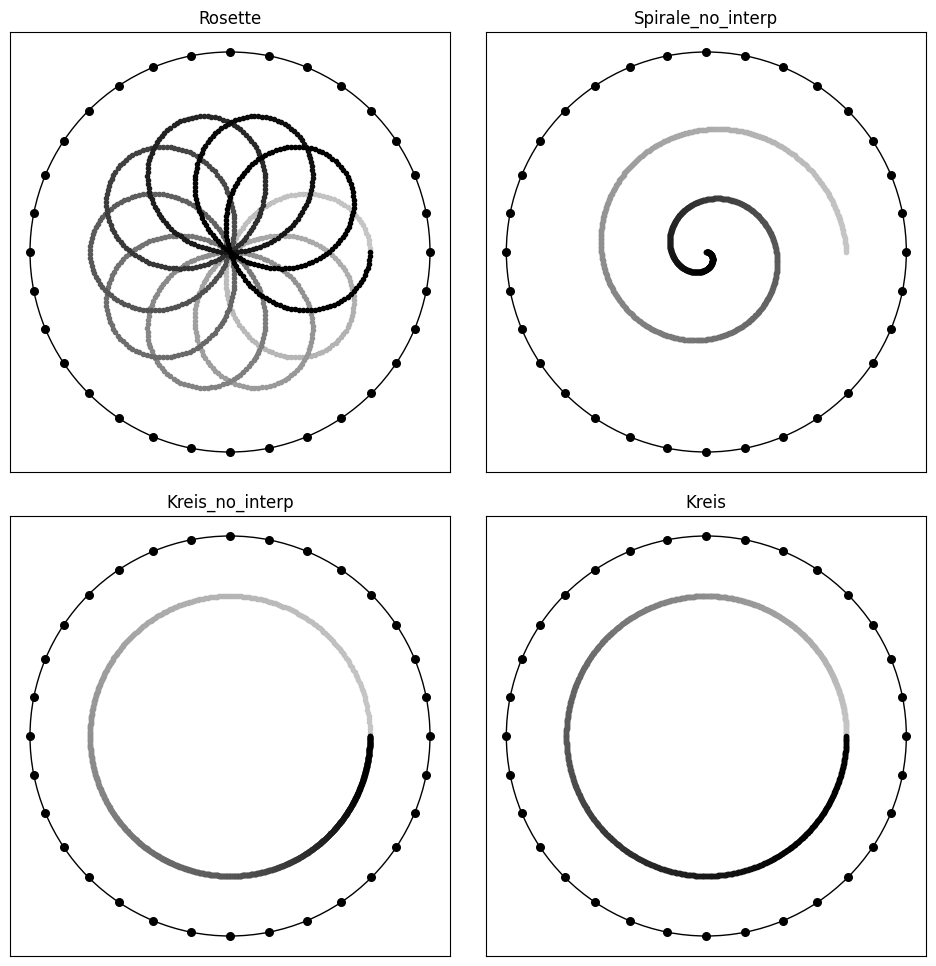

In [11]:
def create_figure_with_trajectories(trajectories, Nsteps, radius, path_radius):
    """
    Create a figure showing trajectories with example points, circles, and frames
    
    Parameters:
    trajectories (list): List of trajectory types to plot
    Nsteps (int): Number of points per trajectory
    radius (float): Radius of the circles around points
    path_radius (float): Radius of the trajectory path
    """
    fig = plt.figure(figsize=(12, 12)) 
    gs = plt.GridSpec(2, 2, figure=fig, wspace=0.05, hspace=0.1)  
    axes = [fig.add_subplot(gs[i]) for i in range(4)]
    
    
    for i, traj in enumerate(trajectories):
        points = create_trajectory(traj, path_radius, Nsteps)
        ax = axes[i]
        margin = 0.1
        global_min_x = min(np.min(points[:, 0]) - margin, -1.1)
        global_max_x = max(np.max(points[:, 0]) + margin, 1.1)
        global_min_y = min(np.min(points[:, 1]) - margin, -1.1)
        global_max_y = max(np.max(points[:, 1]) + margin, 1.1)
        
        #points = points[:-1]  # Remove last point
        ax.plot(points[:, 0], points[:, 1], linestyle = "dashdot", color='black', alpha=0.7, linewidth=2)
        
        num_example_points = 1000
        indices = np.linspace(0, len(points) - 1, num_example_points, dtype = int)
        
        cmap = cm.Greys
        norm = Normalize(vmin=0.0, vmax=0.9)
        colors = cmap(norm(np.linspace(0.3, 1.0, num_example_points)))
        

        for j, idx in enumerate(indices):
            ax.plot(points[idx, 0], points[idx, 1], 'o', color=colors[j], markersize=3)
            
        unit_circle = Circle((0, 0), radius=1, fill=False, color='black', 
                           linewidth=1, linestyle='-')
        ax.add_patch(unit_circle)
        theta = np.linspace(0, 2*np.pi, 33)[:-1]  # 32 points, excluding last duplicate
        electrode_points = np.array([[np.cos(t), np.sin(t)] for t in theta])

        # Plot electrodes as black dots
        ax.scatter(electrode_points[:, 0], electrode_points[:, 1], color='black', s=30)
        
        ax.set_aspect('equal')
        ax.set_title(f'{traj}')
        
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Set axis limits
        ax.set_xlim(global_min_x, global_max_x)
        ax.set_ylim(global_min_y, global_max_y)
        
    return fig

# Example usage:
import os
# Create 'Abbildung' directory if it doesn't exist
if not os.path.exists('Abbildungen'):
    os.makedirs('Abbildungen')

trajectories = ["Rosette", "Spirale_no_interp", "Kreis_no_interp", "Kreis"]
Nsteps = 1000
radius = 0.5
path_radius = 0.7

fig = create_figure_with_trajectories(trajectories, Nsteps, radius, path_radius)
# Save in 'Abbildungen' directory
#save_path = os.path.join('Abbildungen', 'trajectory_visualization_interpol.pdf')
#plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
plt.show()

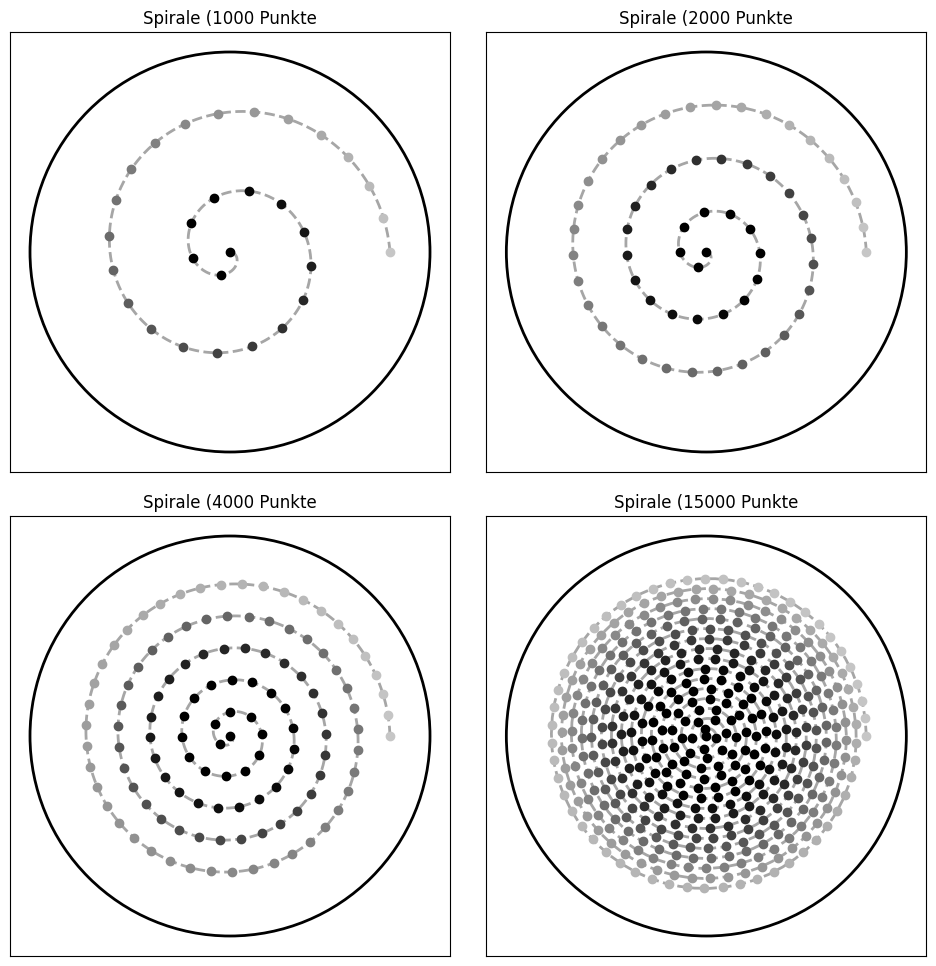

In [3]:
def create_spiral_resolution_comparison(point_counts=[1000, 2000, 4000, 12000], path_radius=0.6):
   
    fig = plt.figure(figsize=(12, 12)) 
    gs = plt.GridSpec(2, 2, figure=fig, wspace=0.05, hspace=0.1)  
    axes = [fig.add_subplot(gs[i]) for i in range(4)]
    
    for i, n_points in enumerate(point_counts):
        points = create_trajectory("Spirale", path_radius, n_points)[:, :2]
        ax = axes[i]
        margin = 0.1
        global_min_x = min(np.min(points[:, 0]) - margin, -1.1)
        global_max_x = max(np.max(points[:, 0]) + margin, 1.1)
        global_min_y = min(np.min(points[:, 1]) - margin, -1.1)
        global_max_y = max(np.max(points[:, 1]) + margin, 1.1)
        ax.plot(points[:, 0], points[:, 1], '--', color='grey', alpha=0.7, linewidth=2)
        
        num_example_points = 30 * (n_points // 1000)
        indices = np.linspace(0, len(points) - 1, num_example_points, dtype=int)
        
        cmap = cm.Greys
        norm = Normalize(vmin=0.0, vmax=0.9)
        colors = cmap(norm(np.linspace(0.3, 1.0, num_example_points)))
        
        for j, idx in enumerate(indices):
            ax.plot(points[idx, 0], points[idx, 1], 'o', color=colors[j], markersize=6)
        
        unit_circle = Circle((0, 0), radius=1, fill=False, color='black', 
                           linewidth=2, linestyle='-')
        ax.add_patch(unit_circle)
        
        
        ax.set_aspect('equal')
        ax.set_title(f'Spirale ({n_points} Punkte')
        
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Set axis limits
        ax.set_xlim(global_min_x, global_max_x)
        ax.set_ylim(global_min_y, global_max_y)
        
    return fig

# Example usage:
import os
# Create 'Abbildungen' directory if it doesn't exist
if not os.path.exists('Abbildungen'):
    os.makedirs('Abbildungen')

point_counts = [1000, 2000, 4000, 15000]
path_radius = 0.8
fig = create_spiral_resolution_comparison(point_counts, path_radius)

# Save in 'Abbildungen' directory
save_path = os.path.join('Abbildungen', 'spiral_resolution_comparison.pdf')
plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
_, _, _, position = load_exp_data("exp_data13")

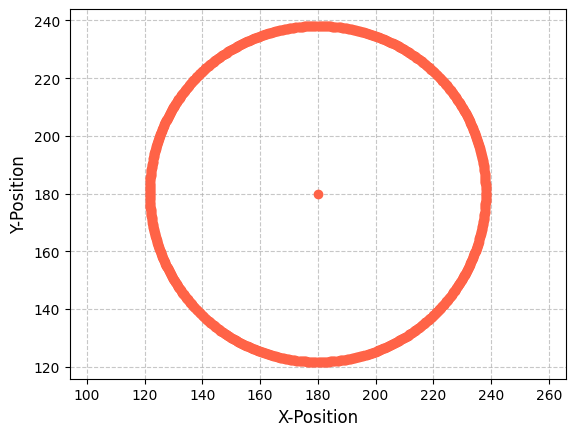

In [5]:
for point_idx in range(0, position.shape[0]):  # Schritte von 10
    plt.plot(position[point_idx, 0], position[point_idx, 1], 'o', 
             color="tomato", markersize=6)

plt.xlabel("X-Position", fontsize=12)
plt.ylabel("Y-Position", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axis('equal')
plt.show()

#Training data: 36 (0.2), 37 (0.6), 38 (0.3), 35 (0.7), 34 (0.4), 39 (0.5) 

In [6]:
voltage, _, _, position = load_exp_data3D("exp_data_3D21")

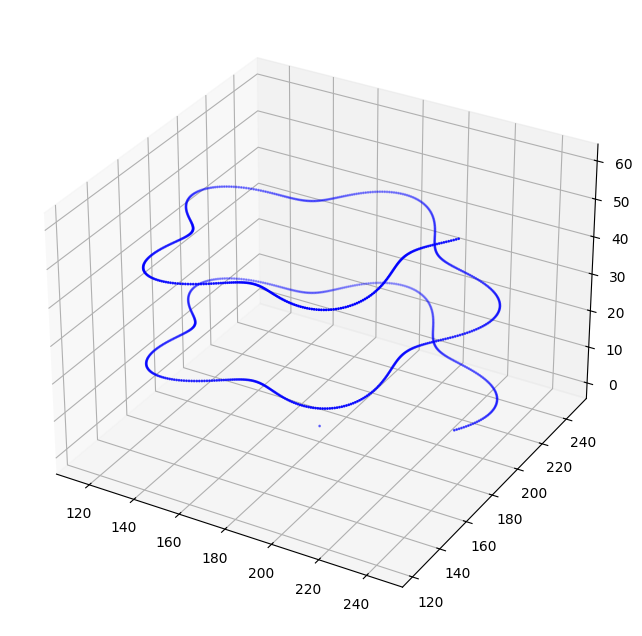

In [7]:
# Create a single 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(position[:, 0], position[:, 1], position[:, 2], color='blue', marker='o', s=1)

In [8]:
from src.classes import Boundary, TankProperties32x2, BallAnomaly
from src.util import create_trajectory_3D
boundary = Boundary()
tank = TankProperties32x2()
num_voxels = 32
scale_factor = num_voxels / tank.T_d  # 32 voxels / 194mm (tank diameter)
ball_diameter = 40
ball = BallAnomaly(x=10.5, y=15, z=10, d=ball_diameter*scale_factor, perm=1)
import matplotlib.pyplot as plt
import numpy as np
from src.util import create_cylinder_mesh, plot_tank_and_ball, voxel_ball, load_exp_data

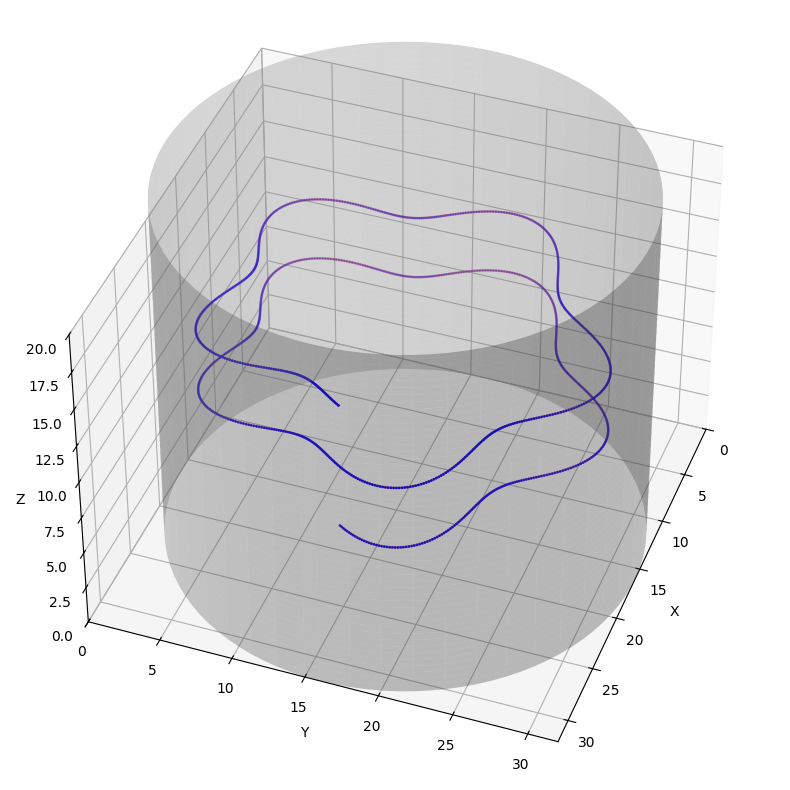

In [9]:
traj_type = "ModulatedHelix"
num_points = 1000
radius = 0.75 * tank.T_r

# Create a single 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create and scale trajectory points
points = create_trajectory_3D(traj_type, radius, num_points)
scaled_points = points.copy()
scaled_points = scaled_points * scale_factor 
scaled_points[:, 0] += 16  
scaled_points[:, 1] += 16

# Create and scale tank mesh
x_tank, y_tank, z_tank = create_cylinder_mesh(tank, n_points=100)
x_tank = x_tank * scale_factor
y_tank = y_tank * scale_factor
z_tank = z_tank * scale_factor
x_tank += 16
y_tank += 16

# Plot tank and trajectory
ax.plot_surface(x_tank, y_tank, z_tank, alpha=0.3, color='gray')
ax.plot(scaled_points[:, 0], scaled_points[:, 1], scaled_points[:, 2], color="red", alpha=0.5)
ax.scatter(scaled_points[:, 0], scaled_points[:, 1], scaled_points[:, 2], color='blue', marker='o', s=1)

# Set view and labels
ax.view_init(elev=40, azim=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0, 32])
ax.set_ylim([0, 32])
ax.set_zlim([0, 20])

plt.tight_layout()
plt.show()

In [10]:
traj_type = "Lissajous"
num_points = 1000
rad

# Create a single 3D plot
fig = plt.figure(figsize=(10, 8))

NameError: name 'rad' is not defined